# Explore here

It's recommended to use this notebook for exploration purposes.

In [ ]:
# Import dependencies
# import os
# from bs4 import BeautifulSoup
import requests
# import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import io
import pandas as pd
import numpy as np

In [7]:
# Install dependencies into the terminal
# pip install pandas requests lxml 

# Fetch the webpage
url = "https://en.wikipedia.org/wiki/List_of_highest-grossing_anime_films"
# Websites think the request is a bot so need header
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0 Safari/537.36"} # Look into later
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code != 200:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")
    # exit()
else:
    print("RESPONSE STATUS IS: ", response.status_code)

RESPONSE STATUS IS:  200


In [9]:
# Extract tables with pandas
html = io.StringIO(response.text)  # Convert the HTML to a text file

# read_html() returns a list of DataFrames
tables = pd.read_html(html) # Scans for <table> tags and converts it into pandas DataFrame. Built to only parse for <table> default behavior
print(f"{len(tables)} tables were found.") # Checks the length of "tables" variable

10 tables were found.


In [24]:
# Inspect the first table
df = tables[0]

# Remove an unwanted column, one time use?
# df.drop(columns=['Ref.'], inplace=True) 

# Rename for usability
df.columns = ["Name", "Revenue", "Year", "Format"]

# Remove unwanted characters in columns, specifically revenue
df["Revenue"] = df["Revenue"].str.replace("$", "", regex=False).replace(",","",regex=True).astype(int) # Interprets the $ sign as a literal string not a regular expression symbol

df.head(10)

,Name,Revenue,Year,Format
0,Demon Slayer: Kimetsu no Yaiba: Mugen Train,506473668,2020,Anime
1,Demon Slayer: Kimetsu no Yaiba: Infinity Castle †,473860091,2025,Anime
2,Your Name,405349022,2016,Anime
3,Spirited Away,395580000,2001,Anime
4,Suzume,323638107,2022,Anime
5,The Boy and the Heron,294200000,2023,Anime
6,The First Slam Dunk,279045965,2022,Anime
7,One Piece Film: Red,246570000,2022,Anime
8,Howl's Moving Castle,237536126,2004,Anime
9,Ponyo,204826668,2008,Anime


In [15]:
# Storing Data into a databse for query purposes
conn = sqlite3.connect("top_japanese_films.db") # Opens a connection to SQLite database file

# Create the table in SQLite
# df.to_sql("top_films", conn, if_exists="replace", index=False)
cursor = conn.cursor() # Gets a curser object, cursor is basically a pen that writes what to do for the table

cursor.execute("SELECT * FROM top_films") # Returns all rows from the table and loads results into the cursor
print("Rows inserted:", cursor.fetchall()) # Retrieves entries

# Commited database changes and closed the connection
# conn.commit()
# conn.close()

Rows inserted: [('Demon Slayer: Kimetsu no Yaiba: Mugen Train', '506473668', 2020, 'Anime'), ('Demon Slayer: Kimetsu no Yaiba: Infinity Castle †', '473860091', 2025, 'Anime'), ('Your Name', '405349022', 2016, 'Anime'), ('Spirited Away', '395580000', 2001, 'Anime'), ('Suzume', '323638107', 2022, 'Anime'), ('The Boy and the Heron', '294200000', 2023, 'Anime'), ('The First Slam Dunk', '279045965', 2022, 'Anime'), ('One Piece Film: Red', '246570000', 2022, 'Anime'), ("Howl's Moving Castle", '237536126', 2004, 'Anime'), ('Ponyo', '204826668', 2008, 'Anime'), ('Jujutsu Kaisen 0', '196290952', 2021, 'Anime'), ('Weathering with You', '193715360', 2019, 'Anime'), ('Stand by Me Doraemon', '183442714', 2014, 'Anime'), ('Pokémon: The First Movie', '172744662', 1998, 'Anime'), ('Princess Mononoke', '170005875', 1997, 'Anime'), ('Bayside Shakedown 2', '164450000', 2003, 'Live-action'), ('Detective Conan: One-eyed Flashback †', '160857704', 2025, 'Anime'), ('Detective Conan: The Million-dollar Pentag

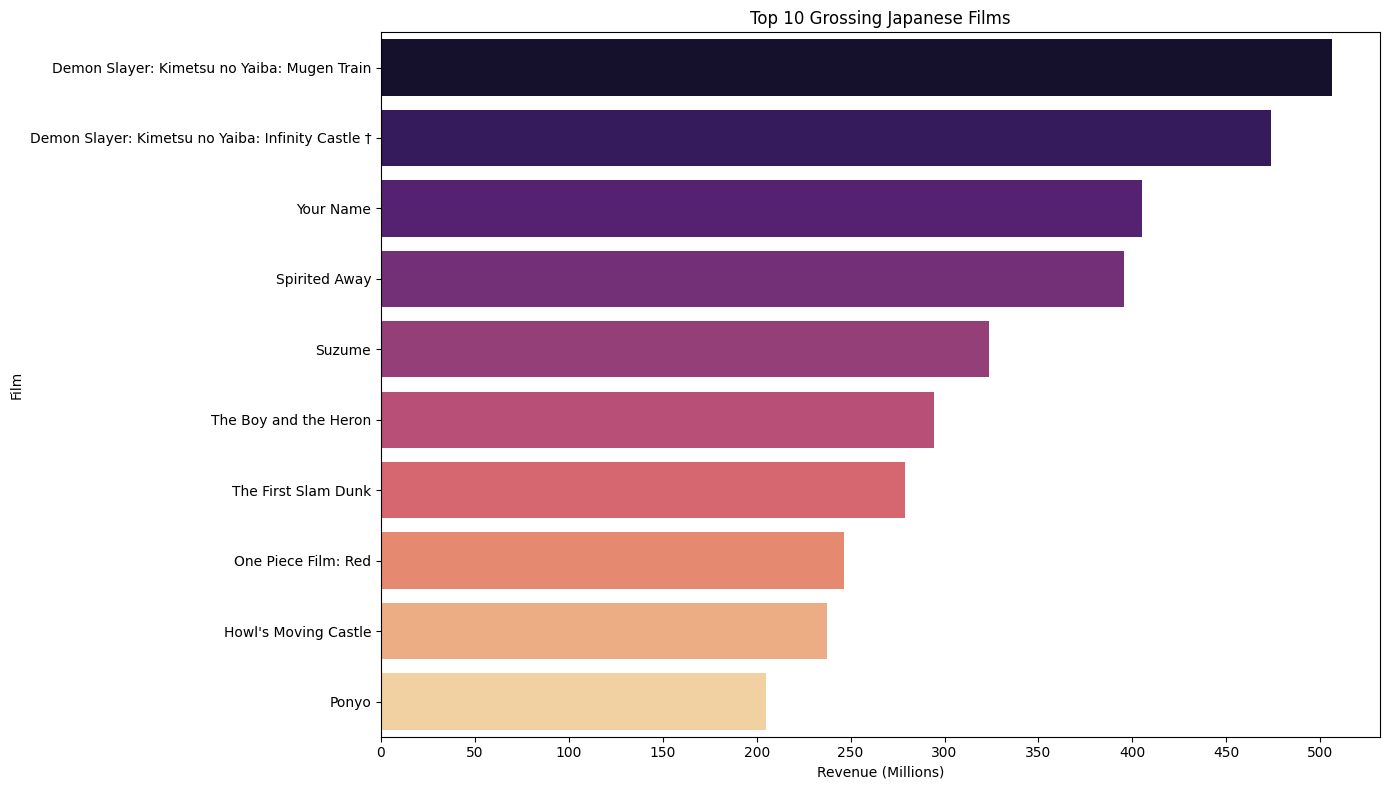

In [44]:
# Visualize the Data

top10 = df.head(10).copy() # Explicitly define copy so no warnings
top10["Revenue"] = top10["Revenue"] / 1000000
plt.figure(figsize=(14, 8))
sns.barplot(data=top10, x="Revenue", y="Name", hue="Name", palette="magma", legend=False)
plt.title("Top 10 Grossing Japanese Films")
plt.xlabel("Revenue (Millions)")
plt.xticks(np.arange(0, 501, 50))  # tick marks every 10
plt.ylabel("Film")
plt.tight_layout()